In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy import linalg as LA
from copy import copy, deepcopy
from sympy import Point, Line, Segment

In [ ]:
# ####### method that check if two segments intersect#######
# def ccw(A,B,C):
#     return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

# # Return true if line segments AB and CD intersect
# def intersect(A,B,C,D):
#     if ((A[0]==D[0] and A[1]==D[1])or(A[0]==C[0] and A[1]==C[1])or(B[0]==C[0] and B[1]==C[1]) or(B[0]==D[0] and B[1]==D[1])):
#         return False
#     return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

In [ ]:
X= np.random.randn(3,2)
p= np.random.randn(1,2)
# X_new = X - p
# print(X_new)

# Y = X_new.tolist()
# print(LA.norm(np.cross(Y[0],Y[1])))
# print(Y)




# A = np.expand_dims(X[0], axis=0)
# A
# print(A)

In [ ]:
# A = X[:,0]
# B = X[:,1]
# print(A)
# C = p[0][1]
# D = p[0][0]

# plt.scatter(A, B, s=80 ,c='r')
# plt.savefig('DataPlot.png')
# plt.scatter(C, D, s=80 ,c='r')
# plt.savefig('DataPlot.png')
# plt.show()



In [ ]:
####### method that check if two segments intersect#######
def ccw(A,B,C):
    return (((A[0]*(B[1]-C[1])) - (A[1]*(B[0] - C[0])) + (B[0] * C[1]) - (C[0] * B[1])) > 0 )  

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    if ((A[0]==D[0] and A[1]==D[1])or(A[0]==C[0] and A[1]==C[1])or(B[0]==C[0] and B[1]==C[1]) or(B[0]==D[0] and B[1]==D[1])):
        return False
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)
    
# print(X[0],X[1],X[2],p[0])
# #intersect(X[0],X[1],X[2],p[0])
# print(intersect(X[0],X[2],X[0],p[0]))    


In [ ]:

  ###### method that take the indeces of two points and give you the smaller path among the two pathes joining the points##########

def getpath(a,b,edgs,path=[]):
  tmp = edgs[:]
  s = -1
  for edg in tmp:
    if edg[0] == a:
      s = edg[1]
      path.append(edg)
      tmp.remove(edg)
      break
    if edg[1] == a:
      s = edg[0]
      path.append(edg)
      tmp.remove(edg)
      break
  if s == b:
    if (len(path) < len(tmp)): 
      return path
    else:
      return tmp
  else :
    return getpath(s,b, tmp, path=path)

    #### testing the method ##########
# edges = [(0, 1), (1, 2), (2, 4), (4, 3), (0, 5), (5, 3)]
# print(getpath(4,2,edges))


In [ ]:
#  ### Test intersection formula
#  def intersection(pt, v, v1, v2):
#     p1, p2, p3, p4 = Point(pt[0],pt[1]), Point(v[0], v[1]), Point(v1[0], v1[1]), Point(v2[0], v2[1])
#     s1 = Segment(p1,p2)
#     s2 = Segment(p3,p4)  
#     return s1.intersection(s2)
# intrsct = np.array(intersection(p[0], X[0], X[1], X[0]), dtype= float) 
# tmppp = np.squeeze(intrsct)
# tmppp

In [ ]:
X


array([[ 1.59859406, -1.37501845],
       [-1.10735079,  0.50539126],
       [ 1.30652765,  0.03520023]])

In [ ]:
X1 = [[0,0],[0,1],[1,0],[1,1]]
# area(X1,[0,2,4,3,1])

In [ ]:
# area(X1,[0,1,4,3,2])

In [ ]:
a = [0., 0.]
b = [0.5, 0.5]
LA.norm(np.cross(a,b)) / 2

0.0

In [ ]:
### Dictionary of quadrants
q=[{},{},{},{}]
centroid = np.mean(X1, axis=0)
Xc = X1 - centroid
for ind,row in enumerate(Xc):
    if (row[0] <0 and row[1] <0):
        q[0][ind]=(row[0],row[1])
    elif (row[0]<0 and row[1] >0):
        q[1][ind]=(row[0],row[1])
    elif (row[0]>0 and row[1]>0):
        q[2][ind]=(row[0],row[1])
    else:
        q[3][ind]=(row[0],row[1])

q

[{0: (-0.5, -0.5)}, {1: (-0.5, 0.5)}, {3: (0.5, 0.5)}, {2: (0.5, -0.5)}]

In [ ]:
centroid

array([0.5, 0.5])

In [ ]:
Xc

array([[-0.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -0.5],
       [ 0.5,  0.5]])

In [ ]:
### Find angles for all the vertices
alpha={}
for i in range(len(q)):
    for j in q[i].keys():
      if q[i][j][0] == 0:
        alpha[j] = 180.0
      else:
        beta=np.degrees(np.arctan(abs(q[i][j][1])/abs(q[i][j][0])))
        if i==0:
            s=90-beta
        elif i==1:
            s=90+beta
        elif i==2:
            s=270-beta
        else:
            s=270+beta
        alpha[j]=s

In [ ]:
# alpha[1] = 500
alpha

{0: 45.0, 1: 135.0, 2: 315.0, 3: 225.0}

In [ ]:
sort_alpha = sorted(alpha, key= lambda key: alpha[key])

In [ ]:
sort_alpha

[0, 1, 3, 2]

In [ ]:
### Find area based on sorted alpha list
def area(X, sort_alpha):
  area = 0
  centroid = np.mean(X, axis=0)
  L = len(sort_alpha)
  for i in range(L):
    if i == L - 1:
      p = sort_alpha[i]
      q = sort_alpha[0]
    else :
      p = sort_alpha[i]
      q = sort_alpha[i+1]
    v1 = X[p] - centroid
    v2 = X[q] - centroid
    # print(v1, v2)
    area += LA.norm(np.cross(v1,v2)) / 2
  return area

In [ ]:
area(X1, sort_alpha)

1.0

In [ ]:
class cycle(object) :
  def __init__ (self):
    self.X = np.random.randn(3,2)
    self.ind = np.arange(self.X.shape[0])
    self.edgs = list(combinations(self.ind, 2))
    self.Y = self.X - self.X[0]
    self.Y=self.Y.tolist()
    self.area=LA.norm(np.cross(self.Y[2],self.Y[1]))/2
    self.peri= LA.norm(self.X[0]-self.X[1])+LA.norm(self.X[0]-self.X[2])+LA.norm(self.X[1]-self.X[2])




 
  
  # def intersection(pt, v, v1, v2):
  #   p1, p2, p3, p4 = Point(pt[0],pt[1]), Point(v[0], v[1]), Point(v1[0], v1[1]), Point(v2[0], v2[1])
  #   s1 = Segment(p1,p2)
  #   s2 = Segment(p3,p4)  
  #   return s1.intersection(s2)

######### method that check if a point is interior it gives true if the point is interior ##########
  def interior(self,p):
    c1=0
    for edg in self.edgs:
      if ( (p[0][1] - self.X[edg[0]][1])*(p[0][1] - self.X[edg[1]][1]) <= 0 and (p[0][0]-self.X[edg[0]][0])*(self.X[edg[0]][1]-self.X[edg[1]][1]) <= (p[0][1]-self.X[edg[0]][1])*(self.X[edg[0]][0]-self.X[edg[1]][0])):
        c1 = c1 + 1
    if c1 % 2 == 0:
      return False
    return True      


  # method that clculate the perimeter of the cycle
  def get_peri(self):
    peri = 0
    for edg in self.edgs:
      peri += LA.norm(self.X[edg[0]] - self.X[edg[1]])
    return peri

   #### method that calculate the area of our object and modify the variable area  ####
  def get_area(self,p,a,b):

     A = self.area
       
    # listind =[]
    # for edg in self.edgs:
    #   listind.append(edg[0])
    #   listind.append(edg[1])
    # listind = set(listind)
    # listind = list(listind)
    # X_new = []
    # for i in listind :
    #   X_new.append(self.X[i,:])  
    # Y = X_new-X_new[0] 
    # Y = Y.tolist()
    # A = 0
    # for i in range(len(Y)-1):
    #   A = A + LA.norm(np.cross(Y[i],Y[i+1]))
    # A = A /2  
     return A + (LA.norm(np.cross([self.X[b][0]-p[0][0],self.X[b][1]-p[0][1]] ,[self.X[a][0]-p[0][0],self.X[a][1]-p[0][1]]))/2)
    


  ########## method that take a new point and give the nearst two points in our objects which their indices belong to one of the edges#######
  def getpoints (self,p):

    tmp = self.X - p
    tmp_norm = np.sum(np.square(tmp), axis=1)

    c=0
    while c==0:
      l1 = np.argmin(tmp_norm)
      for edg in self.edgs:
        if (l1 in edg)  :
          c=1
          break
      if (c==1): 
        # v = self.X[l1]
        # print(v)
        # print(v[0])    
        for edg in self.edgs:
          # v1 = self.X[edg[0]]
          # v2 = self.X[edg[1]]
          # intrsct = np.squeeze(np.array(intersection(p[0], v, v1, v2), dtype=float))
          # print(intrsct)
          if intersect(self.X[l1],p[0],self.X[edg[0]],self.X[edg[1]]) :
            c=0
            break
      tmp_norm[l1] = 100

    
    c=0
    while c==0:
      l2 = np.argmin(tmp_norm)
      for edg in self.edgs:
        
        if (l2 in edg):
          c=1 
          break
      if(c==1):
        #v = self.X[l2]    
        for edg in self.edgs:
          #v1 = self.X[edg[0]]
          #v2 = self.X[edg[1]]
          #intrsct = np.squeeze(np.array(intersection(p[0], v, v1, v2), dtype=float))
          if intersect(self.X[l2],p[0],self.X[edg[0]],self.X[edg[1]]) :
            c=0
            break   
      tmp_norm[l2] = 100
      
    return l1,l2

  ###### The Reproduction method ##############

  def Reproduce(self) :
    p = np.random.randn(1,2)
    while(self.interior(p)):
      p = np.random.randn(1,2)
    a=self.getpoints(p)[0]
    b=self.getpoints(p)[1]
    path = getpath(a,b,self.edgs, path=[])
    for edg in path :
      self.edgs.remove(edg)  

    self.X = np.append(self.X,p, axis=0)
    self.edgs.append((a,len(self.X)-1))
    self.edgs.append((len(self.X)-1,b))
    #self.area = self.area + (LA.norm(np.cross([self.X[b][0]-p[0][0],self.X[b][1]-p[0][1]] ,[self.X[a][0]-p[0][0],self.X[a][1]-p[0][1]]))/2)
    self.area = self.get_area(p,a,b)
    self.peri = self.get_peri()
    return self

########### The EVOLUTION Method is made outside the class, take an array of our objects and start an evolution ######################


 
def evolution(B,m) :
  objects = B[:]
  B=[]
  #while(c < 0.29):
  Aops = []  
  print('the old m',m)
  for obb in objects :  
    if ((obb.area / (obb.peri * obb.peri)) >= 0.9 * m and (obb.area / (obb.peri * obb.peri))<=m ):
      for i in range(5):
        B.append(deepcopy(obb))
      for i in range(5):
        cc = deepcopy(obb)
        B.append(cc.Reproduce())
    
  print(len(B))
  for ob in B :
    Aops.append(ob.area / (ob.peri * ob.peri))
  m = max(Aops)
  print('the new m',m)
  xm = 1/(4 * np.pi)
  print(xm)  
  if ( m == xm):
    return evolution(B,m)  
  else:
    return B
    



  
Aops=[]
C=[]
B = [cycle() for i in range(200)]

for ob in B:
  C.append(ob.area/ (ob.peri * ob.peri))
m = max(C)
C=[]


finalgen = evolution(B,m)   

for ob in finalgen:
  C.append(ob.area/ (ob.peri*ob.peri))
m = max(C)
print(m)


# ###### Creation of the Object ##########  
# ob = cycle()  
# for i in range(10):
#   print('\n')
#   ob.Reproduce()
# print(ob.peri)
# print(ob.area)
# # #p = np.random.randn(1,2)
# #print(ob.getpoints(p))

the old m 0.04780046811961121
330
the new m 0.06234872375752901
0.07957747154594767
0.06234872375752901


In [ ]:
# C = [cycle() for i in range(5)]
# B=[]
# A=[]
# for ob in C :
#   B.append(deepcopy(ob))
# for ob in B :
#   print(ob.X,'\n')  
# print('\n')
# print('\n')
# print('\n')   
# for ob in C :
#   A.append(ob)
# for ob in B :
#   ob.Reproduce()
# for ob in C :
#   print(ob.X,'\n')
# for ob in A :
#   ob.Reproduce()  
# print('\n')
# print('\n')
# print('\n')  
# for ob in C :
#   print(ob.X,'\n')  


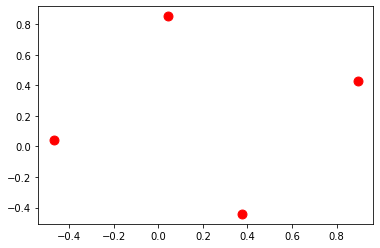

In [ ]:
for ob in finalgen:
  if (ob.area / (ob.peri * ob.peri) == m ):
    listind = []
    for tupl in ob.edgs:
      listind.append(tupl[0])
      listind.append(tupl[1])
    listind = set(listind)
    listind = list(listind)
    A = ob.X[listind,0]
    B = ob.X[listind,1]

    plt.scatter(A, B, s=80 ,c='r')
    plt.savefig('DataPlot.png')
    plt.show()
  

In [ ]:
# listind = []
# for tupl in ob.edgs:
#   listind.append(tupl[0])
#   listind.append(tupl[1])
# listind = set(listind)
# listind = list(listind)
# listind

In [ ]:
### Plot the first generation
# A = ob.X[:,0]
# B = ob.X[:,1]

# plt.scatter(A, B, s=80 ,c='r')
# plt.savefig('DataPlot.png')
# plt.show()

In [ ]:
### Plot the first generation
# A = ob.X[listind,0]
# B = ob.X[listind,1]

# plt.scatter(A, B, s=80 ,c='r')
# plt.savefig('DataPlot.png')
# plt.show()
